# Random Forest - Titanic (Classification)

[[ch0] Titanic Basic Solution Using RandomForest](https://www.kaggle.com/code/werooring/ch0-titanic-basic-solution-using-randomforest/notebook)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
submission = pd.read_csv("./titanic/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 전처리 & 피처엔지니어링

In [6]:
all_data = pd.concat([train, test], sort = False)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
# Age, Fare의 null 값을 중앙값으로 치환
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


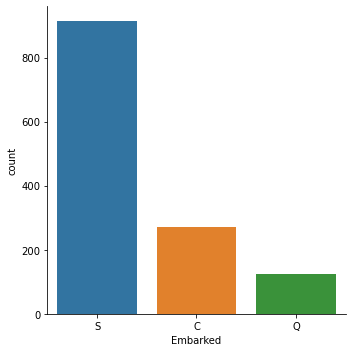

In [9]:
sns.catplot(x='Embarked', kind='count', data=all_data);

In [10]:
# Embarked 중 가장 많은 'S'로 null 값 치환
all_data['Embarked'] = all_data['Embarked'].fillna('S')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


In [11]:
# 나이 feature 구간 나누기
all_data.loc[all_data['Age'] <= 15, 'Age'] = 0
all_data.loc[(all_data['Age'] > 15) & (all_data['Age'] <= 25), 'Age'] = 1
all_data.loc[(all_data['Age'] > 25) & (all_data['Age'] <= 35), 'Age'] = 2
all_data.loc[(all_data['Age'] > 35) & (all_data['Age'] <= 45), 'Age'] = 3
all_data.loc[(all_data['Age'] > 45) & (all_data['Age'] <= 60), 'Age'] = 4
all_data.loc[ all_data['Age'] > 60, 'Age'] = 5

In [12]:
# Title 추출 함수
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [13]:
# Title 추출
all_data['Title'] = all_data['Name'].apply(get_title)
all_data['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [14]:
# Title을 대표 Title로 축소
all_data['Title'] = all_data['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all_data['Title'] = all_data['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all_data['Title'] = all_data['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all_data['Title'] = all_data['Title'].replace(['Mme.'], 'Mrs.')
all_data['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [15]:
# Cabin null값 처리
all_data['Cabin'] = all_data['Cabin'].fillna('Missing')
all_data['Cabin'] = all_data['Cabin'].str[0]
all_data['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [16]:
# 가족 수 및 혼자사는지 여부에 대한 feature 추가
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['IsAlone'] = 0
all_data.loc[all_data['Family_Size']==1, 'IsAlone'] = 1
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [17]:
# 모델링에 필요 없는 feature 삭제
all_data.drop(['Name', 'Ticket'], axis=1, inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1.0,1,female,3.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,female,2.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [18]:
# 범주형 feature 가변수화하기
all_dummies = pd.get_dummies(all_data, drop_first=True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,...,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,3.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,2.0,0,0,7.9250,1,1,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,...,1,0,0,1,0,0,1,0,0,0


In [19]:
train = all_dummies[all_dummies['Survived'].notna()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [20]:
test = all_dummies[all_dummies['Survived'].isna()]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family_Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_male        418 non-null    uint8  
 10  Cabin_B         418 non-null    uint8  
 11  Cabin_C         418 non-null    uint8  
 12  Cabin_D         418 non-null    uint8  
 13  Cabin_E         418 non-null    uint8  
 14  Cabin_F         418 non-null    uint8  
 15  Cabin_G         418 non-null    uint8  
 16  Cabin_M         418 non-null    uint8  
 17  Cabin_T         418 non-null    uin

### 모델링 및 훈련/예측

In [21]:
X = train.drop(['PassengerId','Survived'], axis=1)
y = train['Survived']

test = test.drop(['PassengerId', 'Survived'], axis=1)

In [22]:
clf = RandomForestClassifier(n_estimators=200, min_samples_split=10, random_state=42)
clf.fit(X, y)

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [23]:
pred = clf.predict(test).astype(int)
submission['Survived'] = pred

In [24]:
submission.to_csv("submission.csv", index=False)